In [1]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import fft, ifft
import numpy as np
import scipy
import seaborn as sns
import re
from tqdm.notebook import tqdm

#IMPORTING FUNCTIONS FOR CLASSIFIERS
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, TimeSeriesSplit, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier

#IMPORTING FUNCTIONS FOR CLASSIFIERS METRICS
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

#OPTMIZE PARAMETHERS
import optuna

#IMPORTING FUNCTIONS FROM ./defs

from defs import defs_

# Importing Database

In [2]:
samples = 1024;

df_final = pd.read_csv('df_csv/' + str(samples) + '_samples/dataframe_final', index_col=0, dtype='unicode');
df_quick_test = pd.read_csv('df_csv/' + str(samples) + '_samples/dataframe_simples', index_col=0, dtype='unicode');
df_finalB = pd.read_csv('df_csv/' + str(samples) + '_samples/dataframeB_final', index_col=0, dtype='unicode');

df_final

,s_max_S1,s_sum_S1,s_mean_S1,s_std_S1,psd_max_S1,psd_sum_S1,psd_mean_S1,mean_S1,std_S1,median_S1,...,psd_max_S30,psd_sum_S30,psd_mean_S30,mean_S30,std_S30,median_S30,skew_S30,amp_max_min_S30,kurtosis_S30,Scenario
0,0.0017098931640625,0.514871739328125,0.0005037883946459149,0.00036465933472807325,1.4618673162538337e-06,0.00019764415943894105,1.9338958849211452e-07,-0.001357755576621094,0.14353815569284573,-0.0022832825,...,1.3941068882962035e-06,0.00019870183665858214,1.944244977089845e-07,-0.0009625774402050785,0.14051081616489033,-0.00160728,-0.028261960420297376,0.9763257999999999,0.3741716150735144,1
1,0.0037203177734375,2.49511725,0.0024414063111545987,0.00042207452952675517,6.920382167677479e-06,0.003136830570841197,3.0693058423103688e-06,-0.00040519520195312557,0.15993237175747657,0.0015726744000000002,...,6.195577443248768e-06,0.003116607907721954,3.0495185007064127e-06,-0.0007408178286132816,0.13220517439369525,0.0031077394999999997,-0.13960095714872756,0.8766658,-0.19597598823181217,1
2,0.00551249375,4.491211,0.004394531311154599,0.00041604672746616624,1.5193793671894531e-05,0.00995683516564242,9.742500162076733e-06,0.0023152742476074215,0.17714985774876585,0.002926843,...,1.5196755704974384e-05,0.009943901685402065,9.7298450933484e-06,-0.0010596247472656256,0.14178383623011304,-0.003839492,0.15268936763001495,0.8964205000000001,0.019830716117583247,1
3,0.0080443560546875,6.48730475,0.006347656311154599,0.0005073348621225908,3.2355832167293724e-05,0.0207211160758084,2.0275064653432874e-05,0.002870112068554689,0.22139169075801352,0.0073151234999999995,...,3.0252831934927443e-05,0.020688838629808217,2.024348202525266e-05,-0.0006096456118164065,0.16496941710744412,-0.0008257963500000001,-0.03433807485017546,1.0781062000000001,-0.09253528403808797,1
4,0.0097765474609375,8.4833985,0.008300781311154599,0.0004901323388503907,4.779044012798174e-05,0.035332175243537406,3.45716000426002e-05,0.0012931235627929687,0.1835278711827127,0.0063275250000000005,...,4.4295721381761545e-05,0.03529177519580718,3.453206966321642e-05,-0.0008355930417968758,0.1391090713471743,0.005240619,-0.10385369203581078,1.0376701,0.058457058525502426,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7931,0.4920778080078125,501.51855625,0.490722657778865,0.00046458126034279115,0.12107028456688677,123.05336971627655,0.12040447134665025,0.00476826078776367,0.1802345355376812,0.002092819,...,0.12101891305769145,123.05334544891326,0.12040444760167639,0.0022268341846679663,0.1463088548130687,0.004260801,-0.06072306121432907,0.9396711,-0.07285194834540976,0
7932,0.4938183634765625,503.51464999999996,0.4926757827788649,0.00043057361012635695,0.1219282880533352,124.03483190083494,0.12136480616520054,0.005682367039843752,0.17372629503298528,0.0048936195,...,0.12188481440507852,124.03481609411834,0.12136479069874594,0.0016730884660156261,0.1432019711880003,0.009320239000000001,-0.0628559234161243,1.0328667,0.23811567861600835,0
7933,0.49584270625,505.51074375,0.494628907778865,0.0004405659615977529,0.12292999467066189,125.02021271003738,0.12232897525443971,0.004501759137304686,0.17917499437740247,0.0007907776000000001,...,0.12288674559306505,125.02020344456297,0.12232896618841778,0.001823433908984375,0.15540852807998115,0.005102217500000001,0.12789408137547786,1.0024451,-0.11665106960237459,0
7934,0.49819061132812503,507.5068375,0.496582032778865,0.0004507211880661849,0.12409694260774547,126.00949231690171,0.12329695921418954,0.005475126960449214,0.18346295749577451,0.0024689250000000003,...,0.12384325138224284,126.00946776695636,0.1232969351927166,0.001275242775927735,0.1362552667126023,-5.1783374999999994e-05,0.02412409924378543,0.8374804,-0.05377166902358077,0


# Criando dataframe voltada para 1 sensor

In [3]:
df_ready = defs_.createScaledDataframeScenario(df_final, 1);
df_ready

,s_max_S1,s_sum_S1,s_mean_S1,s_std_S1,psd_max_S1,psd_sum_S1,psd_mean_S1,mean_S1,std_S1,median_S1,skew_S1,amp_max_min_S1,kurtosis_S1,damaged
0,0.0017098931640625,0.514871739328125,0.0005037883946459149,0.00036465933472807325,1.4618673162538337e-06,0.00019764415943894105,1.9338958849211452e-07,-0.001357755576621094,0.14353815569284573,-0.0022832825,0.01540848754149542,0.9939469999999999,0.10365608906656476,1
1,0.0037203177734375,2.49511725,0.0024414063111545987,0.00042207452952675517,6.920382167677479e-06,0.003136830570841197,3.0693058423103688e-06,-0.00040519520195312557,0.15993237175747657,0.0015726744000000002,-0.03158462525774426,0.9305502,-0.10123098978136014,1
2,0.00551249375,4.491211,0.004394531311154599,0.00041604672746616624,1.5193793671894531e-05,0.00995683516564242,9.742500162076733e-06,0.0023152742476074215,0.17714985774876585,0.002926843,-0.003200578863888679,1.3379102999999999,0.4780702410549287,1
3,0.0080443560546875,6.48730475,0.006347656311154599,0.0005073348621225908,3.2355832167293724e-05,0.0207211160758084,2.0275064653432874e-05,0.002870112068554689,0.22139169075801352,0.0073151234999999995,0.04559151014305592,1.3072631000000001,-0.3619600938367933,1
4,0.0097765474609375,8.4833985,0.008300781311154599,0.0004901323388503907,4.779044012798174e-05,0.035332175243537406,3.45716000426002e-05,0.0012931235627929687,0.1835278711827127,0.0063275250000000005,-0.13343487673558488,1.341857,0.33859537447306876,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.009541761328125,8.4833985,0.008300781311154599,0.0004209658098521952,4.552260462145088e-05,0.035299973302814446,3.454009129433899e-05,-0.008528785652050773,0.1629409560350122,-0.00871709,0.04050250389091984,0.9905214,-0.1337553170367305,0
508,0.07181730136718749,72.35839874999999,0.07080078155577299,0.00039536393454544876,0.002578862387832715,2.5615954675715518,0.0025064534907745127,-0.0005630072265624996,0.16909837407343115,0.0028338525,-0.013307286768657136,1.0586799,-0.17523202302588414,0
509,0.1248385904296875,126.25293,0.123535156555773,0.00045071825453314154,0.007792336830235631,7.798441544676404,0.007630569026102156,0.0021597689768945334,0.18104641285732015,-0.001231946,0.043989059343233515,1.1408564,-0.10399815661794598,0
510,0.1190133853515625,120.26464874999999,0.11767578155577299,0.0004006329310843574,0.007082092946419756,7.076200286540319,0.006923875035753736,3.7345056347656036e-05,0.16184869514077863,0.0014814165,-0.057627646433395095,1.0972811999999998,0.12819952663646905,0


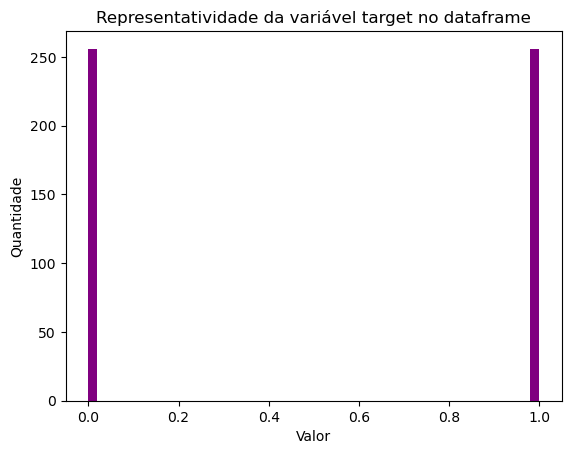

In [4]:
# Check values from database's target 
plt.figure()
plt.title("Representatividade da variável target no dataframe");
plt.xlabel('Valor');
plt.ylabel('Quantidade');

plt.hist(df_ready['damaged'].astype(int),bins = 50,color='purple');

In [30]:

df_test = defs_.createDatabaseSingleSensor(df_finalB, 1);
df_test

,s_max_S1,s_sum_S1,s_mean_S1,s_std_S1,psd_max_S1,psd_sum_S1,psd_mean_S1,mean_S1,std_S1,median_S1,skew_S1,amp_max_min_S1,kurtosis_S1,damaged
0,0.001700947265625,0.5254187902617188,0.0005141084053441476,0.000375134111546019,1.4466108002185822e-06,0.0002069718906404618,2.0251652704546163e-07,-0.0012994515618164058,0.16106936861370183,0.0056914465,-0.11066721150373085,0.9869401,-0.09655415028892422,1
1,0.0036015025390625,2.49511725,0.0024414063111545987,0.00041312351519890973,6.485410269436816e-06,0.0031330104014424187,3.065567907477905e-06,-0.0011206226858398436,0.16205377336559978,-0.005452681,0.0944179297661639,1.1304659,-0.05224544083007343,1
2,0.0061169798828125,4.491211,0.004394531311154599,0.0004915720549679346,1.8708721443366413e-05,0.009991863298801156,9.776774264971777e-06,-0.00013747753720703043,0.21131295994117938,-0.009470138999999999,0.14395121532071178,1.3191813,-0.02537046544895416,1
3,0.00766963984375,6.48730475,0.006347656311154599,0.0004465030141622532,2.9411687666418763e-05,0.02069146595454656,2.0246052793098393e-05,0.0017813727404296863,0.1838244512744018,0.00034578705,0.046062480131920824,1.3538154,0.057745819304428014,1
4,0.009855110351562502,8.4833985,0.008300781311154599,0.0004174833604398379,4.856160002073719e-05,0.03529848125597924,3.4538631365928804e-05,0.0015248213455078107,0.17145975380650394,0.0046324915000000005,-0.023202447658407736,1.1826402,0.07612509751908325,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7931,0.49239281035156246,501.51855625,0.490722657778865,0.00044506303697406735,0.12122533984295487,123.05336064365521,0.12040446246932995,-0.005335176022753905,0.17912190645622933,-0.002185503,-0.027338265936375988,1.2201605,0.1292269205289478,0
7932,0.493883707421875,503.51464999999996,0.4926757827788649,0.00046532519379978156,0.12196055822838811,124.03484781025901,0.12136482173215167,-0.004272731928710935,0.18660141904175448,-0.004680157,0.02906129705454456,1.2731080000000001,0.017920414778662686,0
7933,0.4961542658203125,505.51074374999996,0.4946289077788649,0.0004525283678130062,0.12308452774584668,125.0202181693351,0.12232898059621829,-0.0033993002719726567,0.17105023591780796,-0.0072027485,0.07841541616346018,1.1024421000000002,-0.11029827526708935,0
7934,0.4978674255859375,507.50683749999996,0.4965820327788649,0.00041276876722514424,0.12393598672978451,126.00947557064775,0.12329694282842246,-0.0003443699025390616,0.15291595087602328,0.0010140499,0.06107307952190012,0.8754583,-0.22758344886867787,0


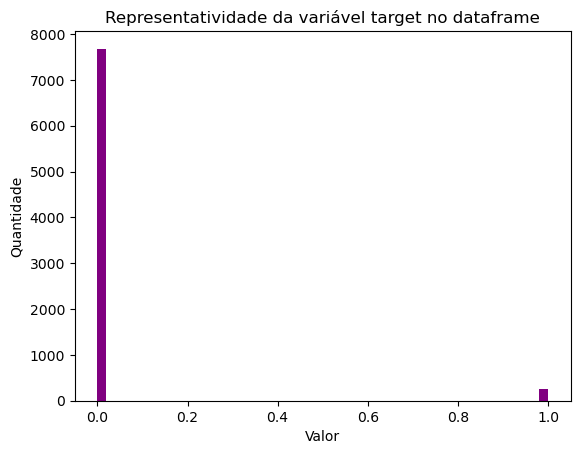

In [31]:
# Check values from database's target 
plt.figure()
plt.title("Representatividade da variável target no dataframe");
plt.xlabel('Valor');
plt.ylabel('Quantidade');

plt.hist(df_test['damaged'].astype(int),bins = 50,color='purple');

# Modelo sem Cross validation

### Preparação dos inputs e target

In [5]:
### Setting X and y for model score:0.5545965387932191

print('Scenario is: ' + str(1))

# Setting target variable
y_new_attemp = df_ready['damaged'];
y_new_attemp = y_new_attemp.astype(int);

# Setting other variables
X_new_attemp = df_ready.drop(columns=['damaged']);
X_new_attemp = X_new_attemp.astype(float);

# Separate database for test and train and 
X_train, X_test, y_train, y_test = train_test_split(X_new_attemp, y_new_attemp, test_size=0.3, shuffle=True);

#Scale df
std_scaler = StandardScaler()
X_scaled_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index);
X_scaled_test = pd.DataFrame(std_scaler.transform(X_test),columns=X_train.columns,index=X_test.index);

print('X_scaled_train, y_train e X_scaled_test, y_test estão prontos.')

Scenario is: 1
X_scaled_train, y_train e X_scaled_test, y_test estão prontos.


### Treinando modelo sem otimização

In [11]:
### DEFAULT PARAMETHERS ON FULL DATAFRAME
rf = RandomForestClassifier(n_estimators = 5000);
rf.fit(X_scaled_train,y_train);

### Predict df test
y_pred = rf.predict(X_scaled_test);
accuracy_test = accuracy_score(y_test, y_pred);
print('Preformance de previsão de df de teste: ' + "{:.4f}".format(accuracy_test))

### Predict df train (overfit)
y_pred = rf.predict(X_scaled_train);
accuracy_train = accuracy_score(y_train, y_pred);
print('Performance de previsão de df de treino: ' + "{:.4f}".format(accuracy_train))
if (accuracy_train > accuracy_test) :
    print('-> overfit(?)')

Preformance de previsão de df de teste: 0.6883
Performance de previsão de df de treino: 1.0000
-> overfit(?)


### Preparação Database B para teste final

In [41]:
### Setting X and y for model score:0.5545965387932191

print('Scenario is: ' + str(1))

# Setting other variables
X_new_attemp = df_test.drop(columns=['damaged']);
X_new_attemp = X_new_attemp.astype(float);

#Scale df
std_scaler = StandardScaler()
X_scaled_train = pd.DataFrame(std_scaler.fit_transform(X_new_attemp), columns=X_new_attemp.columns, index=X_new_attemp.index);

### Predict df test
y_pred = rf.predict(X_scaled_train);
pod = defs_.probabilityOfDamage(y_pred);

print('PoD: ' + str(pod))

Scenario is: 1
PoD: 0.5180191532258065


In [8]:
### OPTMAZING PARAMETHERS TO MAXIMIZE SCORE ON QUICK DATAFRAME {'n_estimators': 800, 'max_depth': 2}
### last score: 0.5761515497421756

def objective(trial):
    ### PARAMS
    # param_n_estimators = trial.suggest_int('n_estimators',100,100000,100);
    param_max_depth = trial.suggest_int('max_depth',1,30,1);
    param_max_features = trial.suggest_int('max_features',1,13,1);

    rf = RandomForestClassifier(n_estimators = 10000, max_depth = param_max_depth, max_features=param_max_features);
    rf.fit(X_scaled_train,y_train);

    ### Predict df test
    y_pred = rf.predict(X_scaled_test);
    accuracy_test = accuracy_score(y_test, y_pred);

    return accuracy_test 

study = optuna.create_study(direction='maximize')
study.optimize(objective,timeout=300)

study.best_params

[I 2023-05-30 08:30:29,218] A new study created in memory with name: no-name-fb31f462-213e-4be1-8da5-20dd800c06f4
[I 2023-05-30 08:30:44,896] Trial 0 finished with value: 0.6753246753246753 and parameters: {'max_depth': 21, 'max_features': 8}. Best is trial 0 with value: 0.6753246753246753.
[I 2023-05-30 08:30:57,383] Trial 1 finished with value: 0.6688311688311688 and parameters: {'max_depth': 21, 'max_features': 4}. Best is trial 0 with value: 0.6753246753246753.
[I 2023-05-30 08:31:14,983] Trial 2 finished with value: 0.6623376623376623 and parameters: {'max_depth': 11, 'max_features': 11}. Best is trial 0 with value: 0.6753246753246753.
[I 2023-05-30 08:31:28,891] Trial 3 finished with value: 0.6623376623376623 and parameters: {'max_depth': 23, 'max_features': 6}. Best is trial 0 with value: 0.6753246753246753.
[W 2023-05-30 08:31:34,660] Trial 4 failed with parameters: {'max_depth': 30, 'max_features': 5} because of the following error: KeyboardInterrupt().
Traceback (most recent 

KeyboardInterrupt: 

# Modelo com Cross validation

### Preparação dos inputs e target

In [50]:
### Setting X and y for model

print('Scenario is: ' + str(1))

# Setting target variable
y_new_attemp = df_ready['damaged'];
y_new_attemp = y_new_attemp.astype(int);

# Setting other variables
X_new_attemp = df_ready.drop(columns=['damaged']);
X_new_attemp = X_new_attemp.astype(float);

#Scale df
std_scaler = StandardScaler()
X_scaled = pd.DataFrame(std_scaler.fit_transform(X_new_attemp), columns=X_new_attemp.columns, index=X_new_attemp.index);

print('X_scaled e y_new_attemp estão prontos.')

Scenario is: 1
X_scaled e y_new_attemp estão prontos.


### Treinando modelo sem otimização

In [51]:
### DEFAULT PARAMETHERS ON FULL DATAFRAME
score_new_attemp = cross_val_score(XGBClassifier(n_estimators = 1000), X_scaled, y_new_attemp);

print('Performance da media das validações cruzadas: ' + "{:.4f}".format(np.mean(score_new_attemp)))

Performance da media das validações cruzadas: 0.3635


# TESTE

In [11]:
### OPTMAZING PARAMETHERS TO MAXIMIZE SCORE ON QUICK DATAFRAME {'n_estimators': 800, 'max_depth': 2}
### last score: 0.5761515497421756

def objective(trial):
    ### PARAMS
    param_n_estimators = trial.suggest_int('n_estimators',100,1000,50);
    param_max_depth = trial.suggest_int('max_depth',1,15,1);

    rf = RandomForestClassifier(n_estimators = param_n_estimators, max_depth = param_max_depth);

    score_def = cross_val_score(rf, X_new_attemp, y_new_attemp);
    score_def.astype(float);
    return np.mean(score_def) 

study = optuna.create_study(direction='maximize')
study.optimize(objective, timeout=300)

study.best_params

[I 2023-05-30 00:44:05,132] A new study created in memory with name: no-name-c1c5f64b-affb-469d-9d41-78b5ed0184e8
[I 2023-05-30 00:44:09,371] Trial 0 finished with value: 0.3481058442794594 and parameters: {'n_estimators': 950, 'max_depth': 2}. Best is trial 0 with value: 0.3481058442794594.
[I 2023-05-30 00:44:13,422] Trial 1 finished with value: 0.30481629545021893 and parameters: {'n_estimators': 750, 'max_depth': 7}. Best is trial 0 with value: 0.3481058442794594.
[I 2023-05-30 00:44:15,212] Trial 2 finished with value: 0.32623262897391964 and parameters: {'n_estimators': 300, 'max_depth': 13}. Best is trial 0 with value: 0.3481058442794594.
[I 2023-05-30 00:44:19,255] Trial 3 finished with value: 0.3067199695412145 and parameters: {'n_estimators': 700, 'max_depth': 9}. Best is trial 0 with value: 0.3481058442794594.
[I 2023-05-30 00:44:22,710] Trial 4 finished with value: 0.3203883495145631 and parameters: {'n_estimators': 600, 'max_depth': 14}. Best is trial 0 with value: 0.34810

{'n_estimators': 200, 'max_depth': 1}

In [12]:
optuna.visualization.plot_optimization_history(study)

In [11]:
### OLD CODE BELOW

In [8]:
defs_.createDatabaseSingleSensor(df_final, 1)

,mean_S1,std_S1,median_S1,skew_S1,amp_max_min_S1,kurtosis_S1,damaged
0,-0.000414370442,0.043120406327645536,-0.003243883,-0.41442675239991716,0.18522184,0.18229650179968981,1
1,-0.00149953008,0.08873689907904413,-0.0073719135000000005,-0.008557772829157796,0.3630676,-0.6650972729370102,1
2,-0.002099744577200001,0.12369873116059492,-0.01570684,0.588571492652289,0.6131021999999999,0.7530364721892133,1
3,-0.0033677626000000005,0.1388221230414223,-0.042125805,0.26839345162009703,0.5585321,-0.7062843969531509,1
4,0.0033172219000000003,0.13300805870201626,-0.0047542875,0.3868517885124701,0.5399411000000001,-0.14875481556053805,1
...,...,...,...,...,...,...,...
162528,0.014895218723999999,0.1436816838486326,-0.0041809065,1.12900580926754,0.8092328,3.0430900402674945,0
162529,0.014240604980000002,0.13816677091787724,0.0084757445,-0.042066688930058285,0.6926772000000001,0.1608569660924406,0
162530,-0.0018931615239999972,0.16121013599053424,2.1088900000000035e-05,0.03225879191744855,0.7634951,0.19964847471308333,0
162531,-0.004739137999999999,0.18341791502114752,0.01831918,-0.08421640261440295,0.8631911000000001,-0.13082919282190275,0


In [9]:
# sensored = rf_models.loc[rf_models['Sensor'] == 20, 'rf_model']

path_used = path[0]
df_scenario = defs_.createDatabase(path_used);
df_scenario = df_scenario.astype(float);
scenario = defs_.getDamageScenarioLabel(path_used);
print('Scenario is: ' + str(scenario))

listing = {};

for i in tqdm(range(30)) :
    sensor = i+1;
    sensor_label = 'S'+ str(sensor);
    df_scenario_S1 = defs_.getStatisticalCaracteristics(df_scenario,sensor_label);
    df_scenario_S1 = df_scenario_S1.astype(float)

    std_scaler = StandardScaler();
    X_scaled = pd.DataFrame(std_scaler.fit_transform(df_scenario_S1), columns=df_scenario_S1.columns, index=df_scenario_S1.index);

    rf_ = rf_models.loc[rf_models['Sensor'] == sensor, 'rf_model'];

    y_pred = rf_[0].predict(X_scaled);
    listing[sensor_label] = defs_.probabilityOfDamage(y_pred)

listing

Scenario is: 1


  0%|          | 0/30 [00:00<?, ?it/s]

NameError: name 'rf_models' is not defined

,Unnamed: 0,mean_S1,std_S1,median_S1,skew_S1,amp_max_min_S1,kurtosis_S1,mean_S2,std_S2,median_S2,...,skew_S29,amp_max_min_S29,kurtosis_S29,mean_S30,std_S30,median_S30,skew_S30,amp_max_min_S30,kurtosis_S30,Scenario
0,0,-0.000414370442,0.043120406327645536,-0.003243883,-0.41442675239991716,0.18522184,0.18229650179968981,0.002539496899999999,0.07326709498315241,-0.0030380579999999997,...,-0.02354757068943298,0.20867329,-0.09261218246012026,0.0026082206780000004,0.05630144437603952,0.0013889112500000001,-0.0270176906355013,0.2728724,0.5556625881783335,1
1,1,-0.00149953008,0.08873689907904413,-0.0073719135000000005,-0.008557772829157796,0.3630676,-0.6650972729370102,0.00025711601200000044,0.07111379813647783,0.0032996125,...,-0.33598191878862077,0.34748330000000005,0.013995772218858171,-0.003290065054,0.0653112391699274,0.0015525472000000001,-0.3633085961641189,0.25344679999999997,-0.6949649764837647,1
2,2,-0.002099744577200001,0.12369873116059492,-0.01570684,0.588571492652289,0.6131021999999999,0.7530364721892133,-0.0053900647,0.14869303266240297,-0.0086230175,...,-0.417049573113767,0.4983139,-0.38685487627178805,0.002435254539999999,0.12316842935483063,0.0095598715,-0.20858393789052662,0.50685,-0.6315823705462122,1
3,3,-0.0033677626000000005,0.1388221230414223,-0.042125805,0.26839345162009703,0.5585321,-0.7062843969531509,0.0016413805600000008,0.11507735752260885,0.003905859,...,0.06925917396814457,0.681977,0.018615043190842062,-0.005249770819999999,0.11419204169476571,0.0048140744999999995,0.06931212580263177,0.5114897,-0.5375619884710399,1
4,4,0.0033172219000000003,0.13300805870201626,-0.0047542875,0.3868517885124701,0.5399411000000001,-0.14875481556053805,0.004867889820000002,0.16221732911934414,0.027308365,...,0.32182510708430795,0.530455,-0.5500877540563107,-1.9895200000000397e-06,0.11270303133598643,-0.0029228609999999997,0.5809104505583018,0.5124597,0.70313499094634,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162528,162528,0.014895218723999999,0.1436816838486326,-0.0041809065,1.12900580926754,0.8092328,3.0430900402674945,0.005905574820200001,0.12153671923777914,3.9536505e-05,...,-0.07322779606086158,0.5400841000000001,-0.42105004936897306,0.0065484234279999986,0.10981191370481382,0.026138124999999998,-0.5863665072579036,0.4496974,-0.20020082177117304,0
162529,162529,0.014240604980000002,0.13816677091787724,0.0084757445,-0.042066688930058285,0.6926772000000001,0.1608569660924406,0.010850616999999998,0.1367264908983254,0.040029999999999996,...,0.3525890771414916,0.7216627,1.1391818207869386,0.0032942288200000004,0.16266539283127435,0.0002579104999999998,0.12494271506529496,0.67206,-0.7725851436083033,0
162530,162530,-0.0018931615239999972,0.16121013599053424,2.1088900000000035e-05,0.03225879191744855,0.7634951,0.19964847471308333,0.0035580945799999998,0.13752647299896875,0.0064928979999999996,...,-0.2598417655695789,0.6364637,-0.5843366819730242,-0.00022290461999999845,0.17004421492624752,-0.0046039345,0.04561572618057951,0.6937398,-0.6636288784607522,0
162531,162531,-0.004739137999999999,0.18341791502114752,0.01831918,-0.08421640261440295,0.8631911000000001,-0.13082919282190275,-0.00969176552,0.15705896655829976,-0.0031893155,...,0.013559759978589134,0.6566634,-0.09818481373975851,0.0014228850600000004,0.12784962043644352,-0.007478978,0.12382761824959346,0.53823,-0.23521563162570214,0


In [ ]:
df_test = defs_.createDatabaseSingleSensor(df_final, 1)

df_test

,mean_S1,std_S1,median_S1,skew_S1,amp_max_min_S1,kurtosis_S1,damaged
0,-0.000414370442,0.043120406327645536,-0.003243883,-0.41442675239991716,0.18522184,0.18229650179968981,1
1,-0.00149953008,0.08873689907904413,-0.0073719135000000005,-0.008557772829157796,0.3630676,-0.6650972729370102,1
2,-0.002099744577200001,0.12369873116059492,-0.01570684,0.588571492652289,0.6131021999999999,0.7530364721892133,1
3,-0.0033677626000000005,0.1388221230414223,-0.042125805,0.26839345162009703,0.5585321,-0.7062843969531509,1
4,0.0033172219000000003,0.13300805870201626,-0.0047542875,0.3868517885124701,0.5399411000000001,-0.14875481556053805,1
...,...,...,...,...,...,...,...
162528,0.014895218723999999,0.1436816838486326,-0.0041809065,1.12900580926754,0.8092328,3.0430900402674945,0
162529,0.014240604980000002,0.13816677091787724,0.0084757445,-0.042066688930058285,0.6926772000000001,0.1608569660924406,0
162530,-0.0018931615239999972,0.16121013599053424,2.1088900000000035e-05,0.03225879191744855,0.7634951,0.19964847471308333,0
162531,-0.004739137999999999,0.18341791502114752,0.01831918,-0.08421640261440295,0.8631911000000001,-0.13082919282190275,0
